# SVM Model

In [1]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # best library ever

## Class label

In [2]:
# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

## Load data

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['./seg_train/', './seg_test/']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            label_tmp = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                img_tmp = cv2.imread(img_path)
                img_tmp = cv2.resize(img_tmp, size)
                images.append(img_tmp)
                labels.append(label_tmp)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels)= load_data()


In [5]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
# print ("Number of predicting examples: " + str(pred_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


## Plot data information

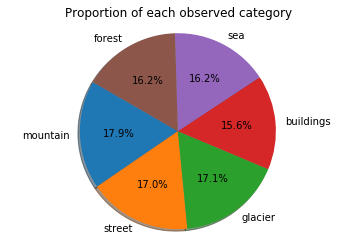

In [6]:
# Plot a pie chart
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

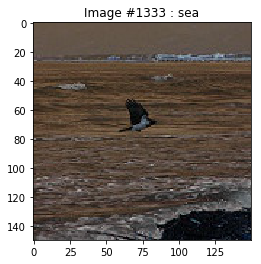

In [8]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

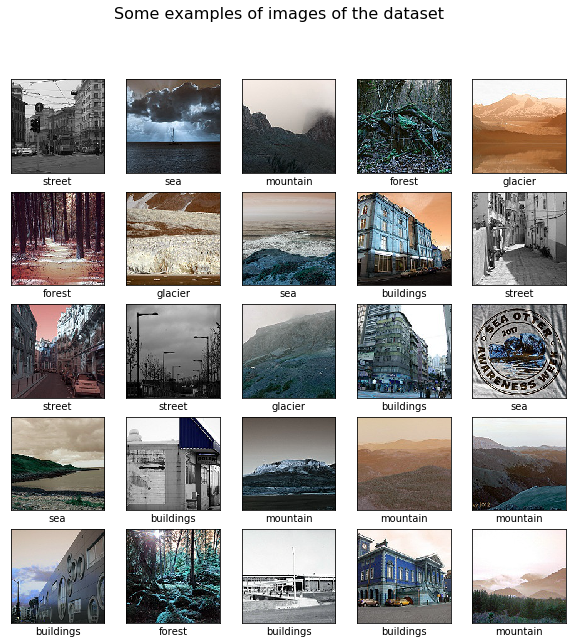

In [9]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## -------------------Model: SVM-------------------------

In [10]:
from sklearn import svm

In [11]:
train_images1 = train_images[:1000]
train_labels1 = train_labels[:1000]

In [12]:
model_SVM = svm.SVC(gamma='scale',max_iter=-1)
train_images_SVM = train_images1.reshape(train_labels1.shape[0],-1)
model_SVM.fit(train_images_SVM, train_labels1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = test_images[index]
img_flatten = img.reshape(1,-1)
predictions = model_SVM.predict(img_flatten)     # Vector of probabilities
pred_img = np.argmax(predictions) # We take the highest probability
pred_label = class_names[predictions[pred_img]]
true_label = class_names[test_labels[index]] 
print(predictions)

[2]


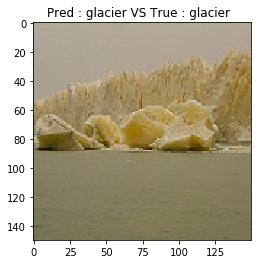

In [14]:
title = 'Pred : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [15]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

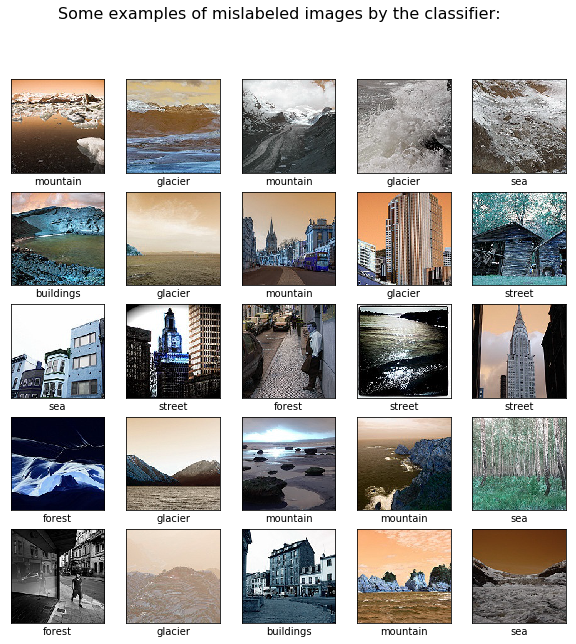

In [16]:
test_images1 = test_images[:1000]
test_labels1 = test_labels[:1000]
test_images_flatten = test_images1.reshape(test_labels1.shape[0], -1)
predictions = model_SVM.predict(test_images_flatten)
pred_labels = predictions
print_mislabeled_images(class_names, test_images1, test_labels1, pred_labels)

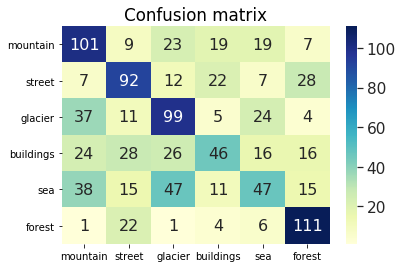

In [17]:
CM = confusion_matrix(test_labels1, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plt.show()

In [19]:
model_SVM.score(test_images_flatten, test_labels1)

0.496

In [18]:
model_SVM.score(train_images_SVM, train_labels1)

0.642